In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta


In [2]:
df = pd.read_csv('/workspaces/codespaces-jupyter/data/btcusd_1-min_data.csv')
print(df.head())
print(df.shape)

      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
(6750281, 6)


In [3]:
daily = pd.DataFrame()
start_date = datetime(2012, 1, 1);
for i in range(0, int(len(df)/(24*60))):
    daily.loc[i, 'time'] = start_date + timedelta(days=i)
    daily.loc[i, 'open'] = df['Open'][i*24*60]
    daily.loc[i, 'close'] = df['Close'][(i+1)*24*60-1]
    daily.loc[i, 'high'] = df['High'][i*24*60:(i+1)*24*60].max()
    daily.loc[i, 'low'] = df['Low'][i*24*60:(i+1)*24*60].min()
    daily.loc[i, 'Volume'] = df['Volume'][i*24*60:(i+1)*24*60].sum()


In [4]:
daily.tail()

,time,open,close,high,low,Volume
4682,2024-10-26,94788.0,96423.0,97339.0,93685.0,843.272691
4683,2024-10-27,96448.0,99422.0,100340.0,95332.0,2076.916581
4684,2024-10-28,99394.0,108532.0,109030.0,99250.0,1637.454583
4685,2024-10-29,108532.0,103932.0,108579.0,100482.0,3417.651868
4686,2024-10-30,103904.0,104711.0,107149.0,103322.0,1985.817509


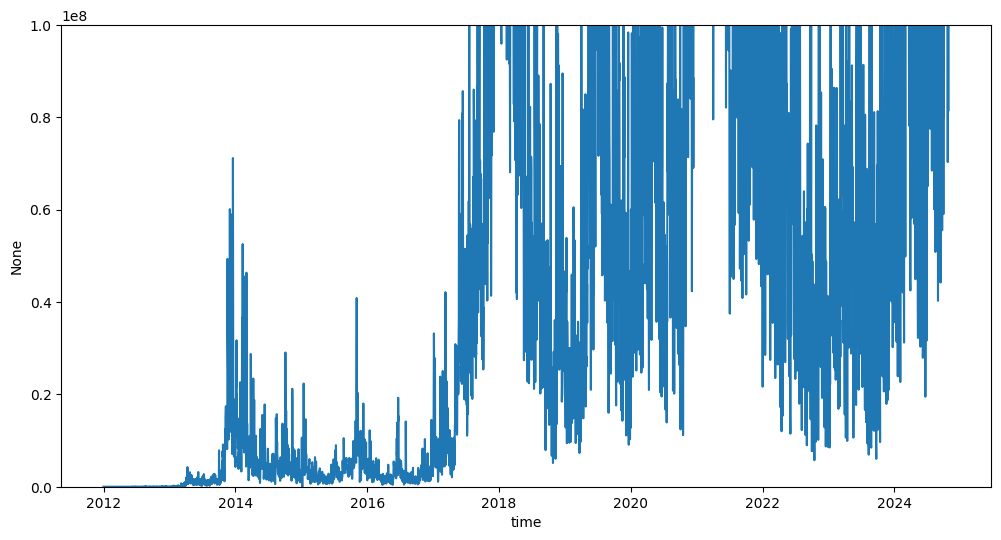

In [5]:
plt.figure(figsize=(12 , 6))
plt.ylim(0, 1e8)
sns.lineplot(x=daily['time'], y=daily['Volume']*daily['close'])
plt.show()


<Axes: >

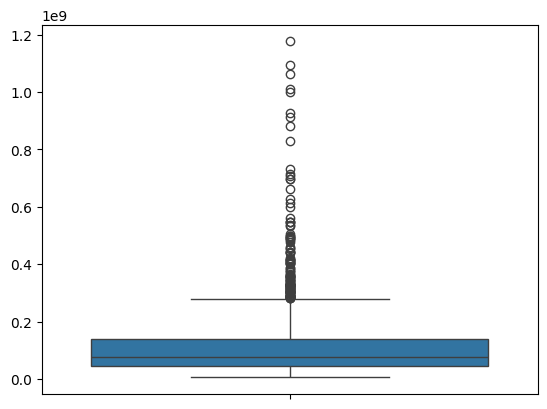

In [6]:
i = 8
sns.boxplot(daily['Volume'][365*i:]*daily['close'][365*i:])

In [9]:
# 15 min interval data 
df_15min = pd.DataFrame()
for i in range(0, int(len(df)/15)):
    df_15min.loc[i, 'Timestamp'] = df['Timestamp'][i*15]
    df_15min.loc[i, 'open'] = df['Open'][i*15]
    df_15min.loc[i, 'close'] = df['Close'][(i+1)*15-1]
    df_15min.loc[i, 'high'] = df['High'][i*15:(i+1)*15-1].max()
    df_15min.loc[i, 'low'] = df['Low'][i*15:(i+1)*15-1].min()
    df_15min.loc[i, 'Volume'] = df['Volume'][i*15:(i+1)*15-1].sum()
    if(i%(15*24*180) == 0):
        print(i)
df_15min.head()

0
64800
129600
194400
259200
324000
388800


,Timestamp,open,close,high,low,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325413e+09,4.58,4.58,4.58,4.58,0.0
2,1.325414e+09,4.58,4.58,4.58,4.58,0.0
3,1.325415e+09,4.58,4.58,4.58,4.58,0.0
4,1.325416e+09,4.58,4.58,4.58,4.58,0.0


In [10]:
import pickle as pkl

with open('/workspaces/codespaces-jupyter/data/btcusd_15min.pkl', 'wb') as f:
    pkl.dump(df_15min, f)
    